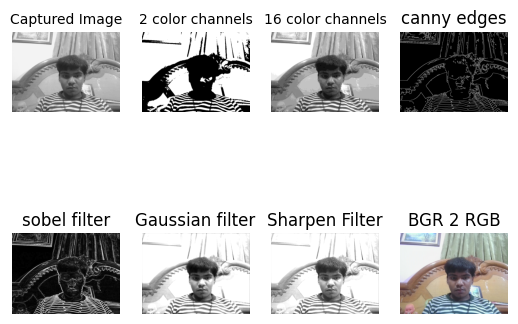

In [2]:
import cv2 as cv
import numpy as np
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt

img=cv.imread("C:\\Users\\Saket\\Desktop\\assignemnt 1\\captured_image.jpg")

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)



plt.subplot(2,4,1)
plt.imshow(gray,cmap="gray",vmin=0, vmax=255)
plt.title("Captured Image",fontsize=10)
plt.axis('off')


# cv.imshow('img',gray)


# cv.waitKey(0)

#-----------------------------------------------------------------

channels_16=np.linspace(0,255,num=16)

blank = np.zeros_like(gray)
for i in range(1,16):
    blank[(gray>=channels_16[i-1]) & (gray<channels_16[i])]=channels_16[i-1]

plt.subplot(2,4,3)
plt.imshow(blank,cmap="gray")
plt.title("16 color channels",fontsize=10)
plt.axis("off")



# cv.imshow('thresh',blank)

# cv.waitKey(0)

#---------------------------------------------------------------------

threshold,thresh1=cv.threshold(gray,150,255,cv.THRESH_BINARY)
plt.subplot(2,4,2)
plt.imshow(thresh1,cmap="gray")
plt.title("2 color channels",fontsize=10)
plt.axis("off")

# cv.imshow('Thresh 2 channel',thresh)

# cv.waitKey(0)

#-------------------------------------------------------------------------

canny=cv.Canny(gray,50,100,L2gradient=True)

plt.subplot(2,4,4)
plt.imshow(canny,cmap="gray")
plt.title("canny edges")
plt.axis("off")


# cv.imshow('canny',canny)
# cv.waitKey(0)

#-------------------------------------------------------------------------

sobelx=cv.Sobel(gray,cv.CV_64F,1,0)
sobely=cv.Sobel(gray,cv.CV_64F,0,1)
sobel_combined = cv.magnitude(sobelx, sobely)
sobel_combined = cv.convertScaleAbs(sobel_combined)



plt.subplot(2,4,5)
plt.imshow(sobel_combined,cmap="gray")
plt.title("sobel filter")
plt.axis("off")


# cv.waitKey(0)

#------------------------------------------------------------

imgx = Image.open("C:\\Users\\Saket\\Desktop\\assignemnt 1\\captured_image.jpg")
imgx = imgx.convert("L")

filtered = imgx.filter( ImageFilter.Kernel( (3,3), (.0625,.125,.0625,.125,.25,.125,.625,.125,.0625), 1, 0) )
plt.subplot(2,4,6)
plt.imshow(filtered, cmap="gray")
plt.title("Gaussian filter")
plt.axis("off")
# plt.show()

#------------------------------------------------------------------------------------



sharpen = filtered.filter( ImageFilter.Kernel( (3,3), (0,-1,0,-1,5,-1,0,-1,0), 1, 0) )
plt.subplot(2,4,7)
plt.imshow(sharpen, cmap="gray")
plt.title("Sharpen Filter")
plt.axis("off")
# plt.show()

#------------------------------------------------------------------------------------------



bgr2rgb=img[:, :, [2, 1, 0]]
plt.subplot(2,4,8)

plt.imshow(bgr2rgb)
plt.title("BGR 2 RGB")
plt.axis("off")


#----------------------------------------------------------------------

plt.show()